<a href="https://www.kaggle.com/code/camiloarg30/01-titanic-survivor-predictor?scriptVersionId=292636167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **🚢 Proyecto Titanic: Predicción de supervivencia con machine learning**

**Autor:** [Juan Camilo Sánchez Navarro ](https://linktr.ee/camiloarg30)

**Fecha:** Enero 2026

**Metodología:** CRISP-DM

# **1. Contexto**

## **1.1. Business understanding**

El hundimiento del Titanic es uno de los acontecimientos más importantes  y famosos que ha involucrado a naufragios en la historia. Aunque hubo un elemento de suerte, parece que ciertos grupos de personas tenían más probabilidades de sobrevivir que otros.

**Objetivo del Proyecto:**
Construir un modelo predictivo que responda a la pregunta: *"¿Qué tipo de personas tenían más probabilidades de sobrevivir?"* utilizando datos de los pasajeros como (nombre, edad, precio del boleto, clase socioeconómica, entre otros).

**Criterio de Éxito:**
Superar el benchmark base de Kaggle (Accuracy > 76%) mediante técnicas de análitica de datos.

# **2. Carga y revisión inicial**

## **2.1. Data Understanding**

Se importan las librerías a usar, se cargan los datasets.

*   **Train.csv:** Datos históricos con la variable objetivo `Survived` conocida.
*   **Test.csv:** Datos futuros donde debemos predecir la supervivencia.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv("/kaggle/input/titanic/test.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Metadatos:**

El significado de cada una de las variables en los datasets es:

### 2.2 Diccionario de Datos (Metadatos)
A continuación, se define cada una de las variables contenidas en el dataset, su significado y su tipo de medición.

| Variable | Definición | Descripción y Notas Analíticas |
| :--- | :--- | :--- |
| **PassengerId** | ID del Pasajero | Número único para identificar filas. No tiene poder predictivo y se debe excluir del modelo. |
| **Survived** | Supervivencia | **Variable Objetivo (Target).** <br> `0` = No sobrevivió <br> `1` = Sobrevivió |
| **Pclass** | Clase del Ticket | Indicador del estatus socioeconómico (SES). <br> `1` = Alta (Clase Alta) <br> `2` = Media (Clase Media) <br> `3` = Baja (Clase Baja) <br> *Nota: Aunque es numérica, funciona como una variable ordinal categórica.* |
| **Name** | Nombre | Nombre completo del pasajero. Contiene títulos ("Mr.", "Mrs.", "Master") que pueden extraerse para inferir estatus social o estado civil. |
| **Sex** | Sexo | Género del pasajero (`male`, `female`). Históricamente, se priorizó a las mujeres en la evacuación. |
| **Age** | Edad | Edad en años. Si es menor a 1, es fraccionaria (ej. 0.5). Vital para identificar niños y ancianos (grupos vulnerables prioritarios). |
| **SibSp** | Hermanos / Esposos | Número de hermanos + cónyuges a bordo. Indica el tamaño de la familia horizontal. |
| **Parch** | Padres / Hijos | Número de padres + hijos a bordo. Indica el tamaño de la familia vertical. |
| **Ticket** | Número de Ticket | Código alfanumérico del boleto. Puede contener prefijos que indiquen ubicación, pero requiere limpieza avanzada. |
| **Fare** | Tarifa | Precio pagado por el pasaje. Altamente correlacionado con `Pclass` y la ubicación en el barco. |
| **Cabin** | Número de Cabina | Código de la cabina (ej. C85). La letra inicial indica la cubierta (Deck) del barco, lo cual afecta la distancia a los botes salvavidas. |
| **Embarked** | Puerto de Embarque | Puerto donde subió el pasajero. <br> `C` = Cherbourg <br> `Q` = Queenstown <br> `S` = Southampton |


# **3. Diagnóstico de calidad de los datos**



Se realiza una inspección en cada dataset para detectar problemas de calidad en los datos

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Se puede identificar que:
* Las variables ("Age", "Cabin") de **Train.csv:**
* Las variables ("Age", "Cabin", "Fare") de **Test.csv:**

tienen valores faltantes que deben ser tratados, debido a que sin datos completos no es posible implementar el modelo predictivo, para ello, se propone:
1. Imputar las variables "Age" para cada dataset y la variable "Fare" para el dataset **Test.csv:**
2. Eliminar la columna "Cabin" en cada dataset, ya que debido a que cuenta con muy pocos datos en comparación con el total de los datos. En terminos de porcentaje, se tiene:
* En **Train.csv:** 204/891 = 0.228956229
* En **Test.csv:** 91/417 = 0.2182254197

de tal manera que como en cada uno hay una gran cantidad de datos faltantes, no se deben imputar porque al hacerlo, pueden verse sesgados los valores de la variables por solo un pequeña porción de los datos y por ello, se va a eliminar la variable "Cabin" tanto en **Train.csv:** como en **Test.csv:**

# **4. Limpieza y tratamiento de los datos**

## **4.1 Data Preparation**


### **Datos Faltantes:**

Basado en el diagnóstico anterior, se toman las siguientes decisiones estratégicas para manejar los datos faltantes:

1.  **Variable `Age` (Edad):** Imputar con la Media. La edad es vital para determinar supervivencia (niños/ancianos), y perder esos registros es muy costoso para el objetivo determinado.
2.  **Variable `Embarked` (Puerto):** Faltan solo 2 registros. se imputa con la moda porque los faltantes son mínimos y es preferible mantener consistencia categórica.  
3.  **Variable `Cabin` (Cabina)**: Se elimina porque el porcentaje faltante es muy alto. Intentar imputar tantos datos introduciría un ruido masivo y sesgo artificial en el modelo.

In [5]:
#Limpieza de datos para train
train["Age"] = train["Age"].fillna(train["Age"].mean())

train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])


#Limpieza de datos para test
test["Age"] = test["Age"].fillna(test["Age"].mean())

test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])

#En ambos casos, se va a eliminar la variable "Cabin"
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### **Codificación de Variables (Encoding)**

Los modelos de Machine Learning requieren entradas numéricas. Las variables categóricas (`Sex`, `Embarked`) contienen información valiosa, pero están en formato texto.

**Estrategia de transformación:**
*   **Sex:** Mapeo binario directo (`male=0`, `female=1`).
*   **Embarked:** Mapeo numérico (`S=0`, `C=1`, `Q=2`).

**Selección de Variables (Feature Selection):**
Las variables `Name` y `Ticket` son identificadores únicos de texto y alta cardinalidad. De tal manera que no aportan valor predictivo directo, por lo que se decide **excluirlas** para simplificar el modelo.

In [7]:
for col in ["Sex", "Embarked"]:
    print(col, train[col].nunique(), train[col].unique())

Sex 2 ['male' 'female']
Embarked 3 ['S' 'C' 'Q']


In [8]:
#Para train.csv
train["Sex"] = train["Sex"].map({"male": 0, "female": 1}).astype("Int64")
train["Embarked"] = train["Embarked"].map({"S": 0, "C": 1, "Q":2}).astype("Int64")

#Para test.csv
test["Sex"] = test["Sex"].map({"male": 0, "female": 1}).astype("Int64")
test["Embarked"] = test["Embarked"].map({"S": 0, "C": 1, "Q":2}).astype("Int64")

train = train.drop(columns=['Name', 'Ticket'])
test = test.drop(columns=['Name', 'Ticket'])

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    Int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    Int64  
dtypes: Int64(2), float64(2), int64(5)
memory usage: 64.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    Int64  
 3   Age          418 non-null    float64
 4   SibSp       

# **5. Modelo de predicción**

## **5.1. Separación de datos y modelamiento**

Antes de entrenar cualquier modelo predictivo, se debe dividir el dataset de entrenamiento **train.csv** en dos:
1.  **Set de Entrenamiento (70%):** Para que el modelo aprenda patrones.
2.  **Set de Validación (30%):** Evaluar su rendimiento.

Se va a usar `train_test_split` de Scikit-Learn con una semilla aleatoria (`random_state=42`) para garantizar que los resultados sean reproducibles.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#1. Variable dependiente y variables independientes
X = train.drop(columns=['Survived', 'PassengerId'])
y = train['Survived']

# 2. Dividir en Train y Validación (70/30)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(random_state=42)

# 4. Entrenamiento del modelo de Regresión logística
modelo.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

> Nota técnica: durante el entrenamiento puede aparecer un `ConvergenceWarning` indicando que el optimizador alcanzó el límite de iteraciones antes de converger.  


## **5.2 Evalución del modelo**

Una vez entrenado el modelo, se evalúa con el **Set de Validación** (el 20% de datos que no se usaron para entrenarlo).

Usaremos dos métricas clave:
1.  **Accuracy (Exactitud):** El porcentaje total de aciertos.
2.  **Matriz de Confusión:** Para observas los errores en las predicciones (Falsos positivos o Falsos negativos).

Accuracy del Modelo: 80.60%

Matriz de Confusión:


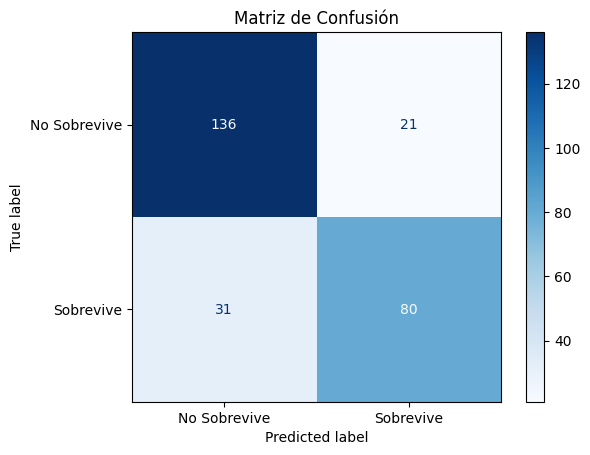

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Hacer predicciones en el set de validación
y_pred = modelo.predict(X_val)

# 2. Calcular Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy del Modelo: {acc:.2%}")

# 4. Matriz de Confusión Visual
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Sobrevive", "Sobrevive"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

**Interpretación de resultados**
El modelo alcanza un **Accuracy ~80%**, superando el benchmark base (~76%), lo que sugiere que las variables seleccionadas capturan parte de la lógica de supervivencia.


# **6. Deployment**

## **6.1. Generación de predicciones**

Finalmente, se procede a aplicar el modelo entrenado a los datos de prueba oficiales de Kaggle (`test.csv`) para generar las predicciones finales.

Se va a generar un archivo llamado `predicciones.csv` que cumple con el formato requerido para participar en la competencia: dos columnas, `PassengerId` y `Survived`.


In [11]:
X_test_kaggle = test.drop(columns=['PassengerId'])

# 1. Hacer predicciones finales
predicciones_finales = modelo.predict(X_test_kaggle)

# 2. Crear el DataFrame de entrega
predicciones = pd.DataFrame({
    'PassengerId': test['PassengerId'], # ID original del test
    'Survived': predicciones_finales    # predicciones (0 o 1)
})

predicciones.head(20)

# 3. Guardar el archivo CSV para la competencia en kaggle
predicciones.to_csv('predicciones.csv', index=False)
print("¡Archivo 'predicciones.csv' generado con éxito!")

¡Archivo 'predicciones.csv' generado con éxito!


In [12]:
predicciones.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
